In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# set default size for plots
matplotlib.rcParams['figure.figsize'] = (16, 8)

In [3]:
# load macrodata dataset
df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [6]:
# make an index object which stores dates according to the quarters

index = pd.Index(sm.tsa.datetools.dates_from_range("1959Q1", "2009Q3"))
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Hodrick-Prescott Filter

HP filter will remove short term fluctuations and display long term trend. Statsmodel's `sm.tsa.filters.hpfilter` will accomplish this

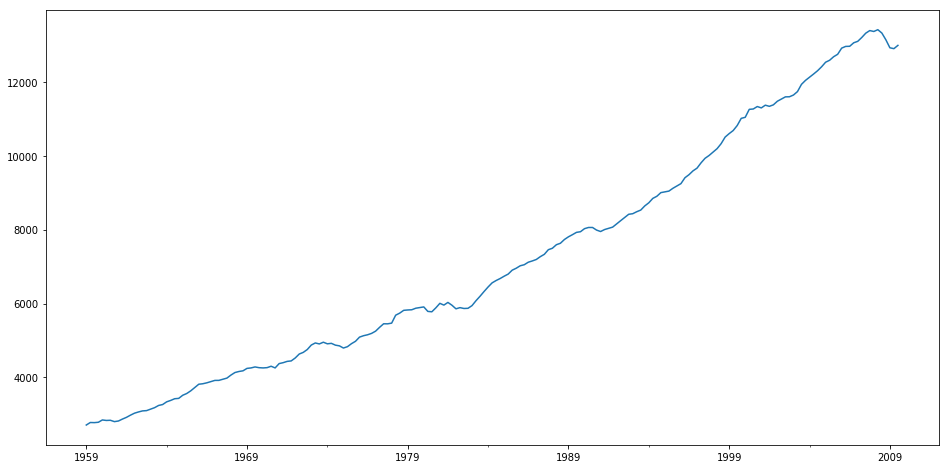

In [7]:
df["realgdp"].plot();

By default this contains a lot of fluctuations but we will use HP filter to remove that

In [8]:
cycle, trend = sm.tsa.filters.hpfilter(df["realgdp"])
df["realgdp_trend"] = trend


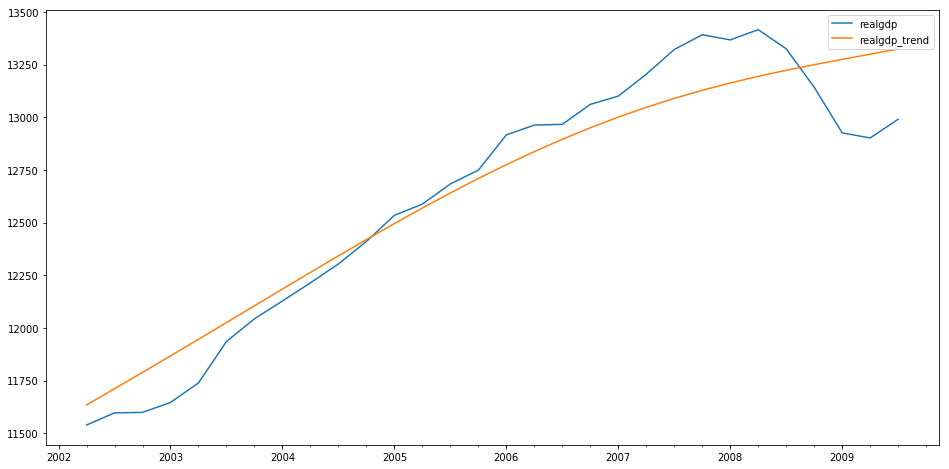

In [9]:
df[["realgdp", "realgdp_trend"]][-30:].plot();

## EWMA - Exponentially Weighted Moving Averages

There are certain disadvantages in using SMA: 
1. Smaller window size are noisy
2. It always lags by the window size
3. Puts equal weights everywhere

EWMA puts more weight into recent values and lesser weights into older ones. Hence, newer values get more importance than previous ones. 

In [10]:
df_airline = pd.read_csv("datasets/airline_passengers.csv", index_col="Month")
df_airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [11]:
df_airline.info() # oops we have some na values

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [12]:
df_airline = df_airline.dropna()
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [13]:
# convert the index to datetime index
df_airline.index = pd.to_datetime(df_airline.index)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [14]:
# create 6 month and 12 month SMA
df_airline["6M-SMA"] = df_airline["Thousands of Passengers"].rolling(window=6).mean()
df_airline["12M-SMA"] = df_airline["Thousands of Passengers"].rolling(window=12).mean()

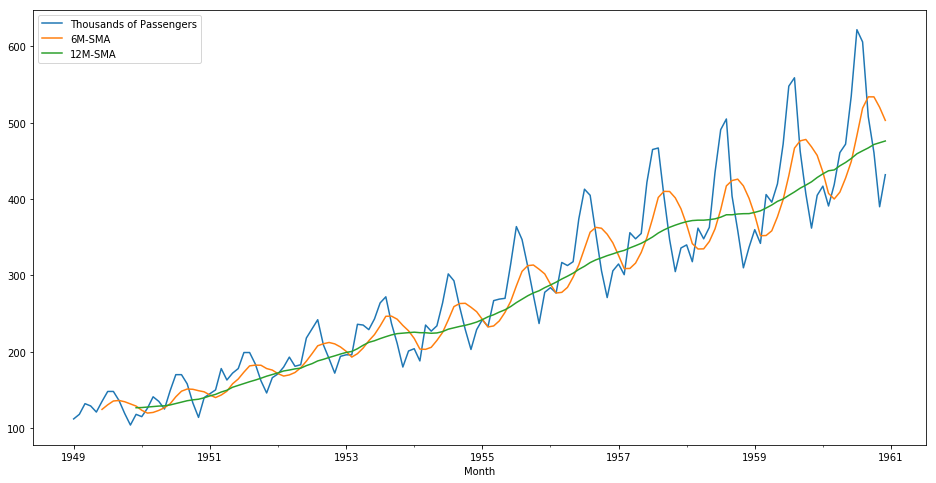

In [15]:
df_airline[["Thousands of Passengers", "6M-SMA", "12M-SMA"]].plot();

In [16]:
# calculating EWMA

df_airline["EWMA"] = df_airline["Thousands of Passengers"].ewm(span=12).mean() 

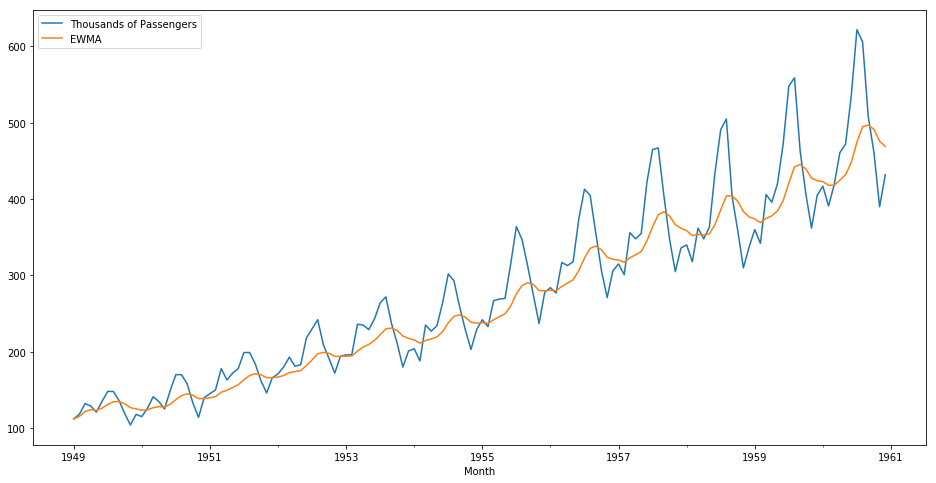

In [17]:
df_airline[["Thousands of Passengers", "EWMA"]].plot();

## ETS Decomposition


ETS is Error, Trend, and Seasonality. It is a forecasting technique that decomposes times series into following parts:

1. Trend: The overall structure - whether it is increasing or decreasing. 
2. Seasonality: Short term recurring patterns
3. Error: Residuals, or noise in the data.
4. Level: The average value of the time series.


The time series can be of two types:

### 1. Additive

Where we can represent the time series as:

Time Series = Error + Trend + Seasonality + Level

It has following characteristics:
1. Trend line is linear
2. The Seasonality has same frequency (width) and amplitude (height)


### 2. Multiplicative

Where we can represent the time series as:

Time Series = Error \* Trend \* Seasonality \* Level

It has following characteristics:
1. Trend line is non linear: exponential, for instance.
2. The Seasonality has different frequence and amplitude. 




In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# multiplicative because the trend is not really linear
result = seasonal_decompose(df_airline["Thousands of Passengers"], model="multiplicative")

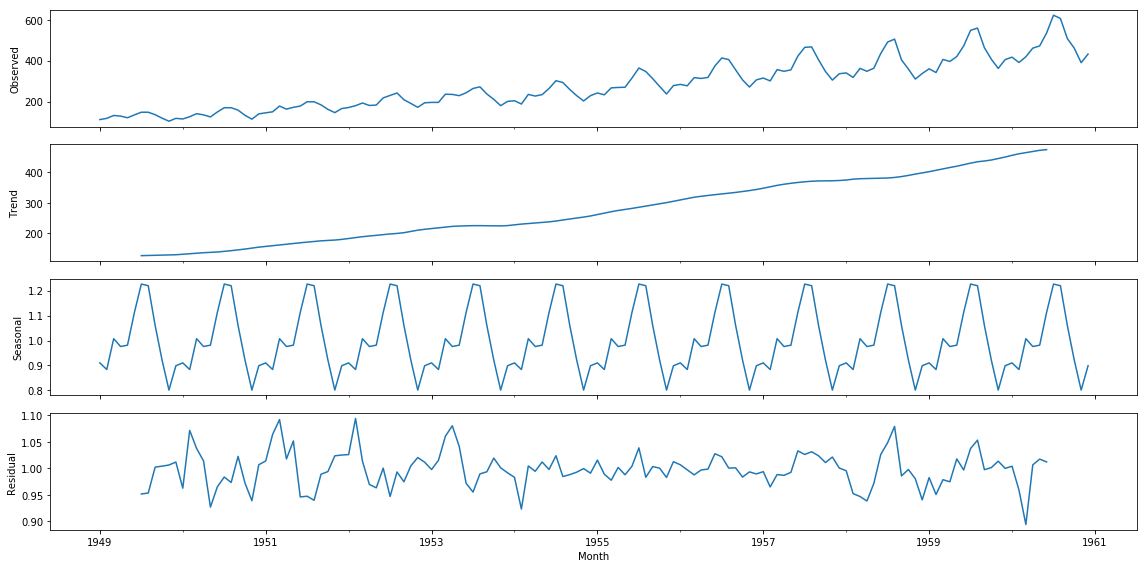

In [19]:
result.plot();

## ARIMA - Auto Regressive Integrated Moving Averages



In [29]:
df_milk = pd.read_csv("datasets/monthly-milk-production-pounds-p.csv")
df_milk.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [30]:
# rename columns
df_milk.columns = ["Month", "Milk in Pounds per Cow"]

# drop the last row, it's weird
df_milk = df_milk.drop(168, axis=0)

# Convert index to datetime
df_milk["Month"] = pd.to_datetime(df_milk["Month"])
df_milk.set_index("Month", inplace=True)
df_milk.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


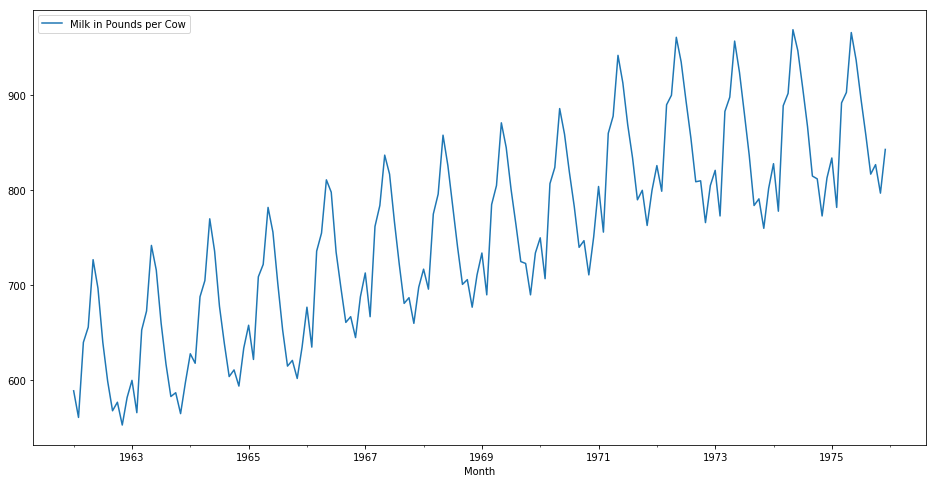

In [32]:
df_milk.plot();

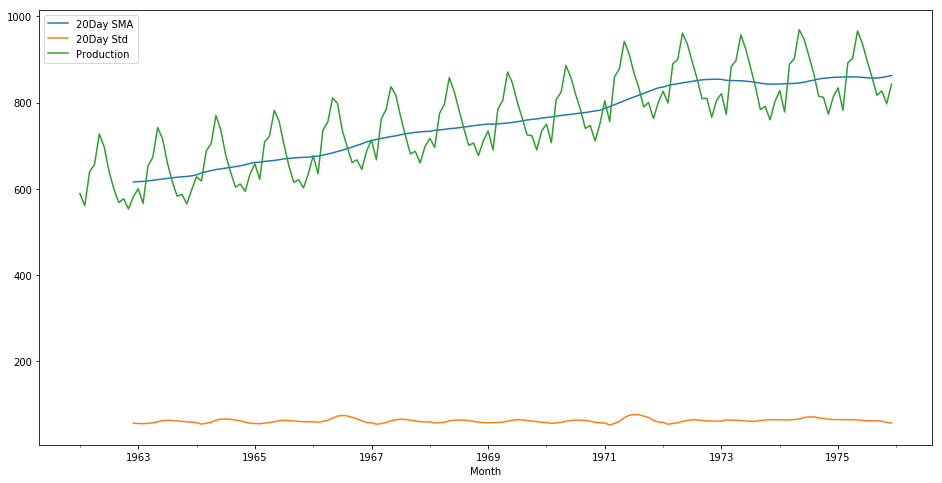

In [35]:
# plot moving averages

df_milk["Milk in Pounds per Cow"].rolling(window=12).mean().plot(label="20Day SMA")
df_milk["Milk in Pounds per Cow"].rolling(window=12).std().plot(label="20Day Std")
df_milk["Milk in Pounds per Cow"].plot(label="Production")
plt.legend();

### ETS decomposition


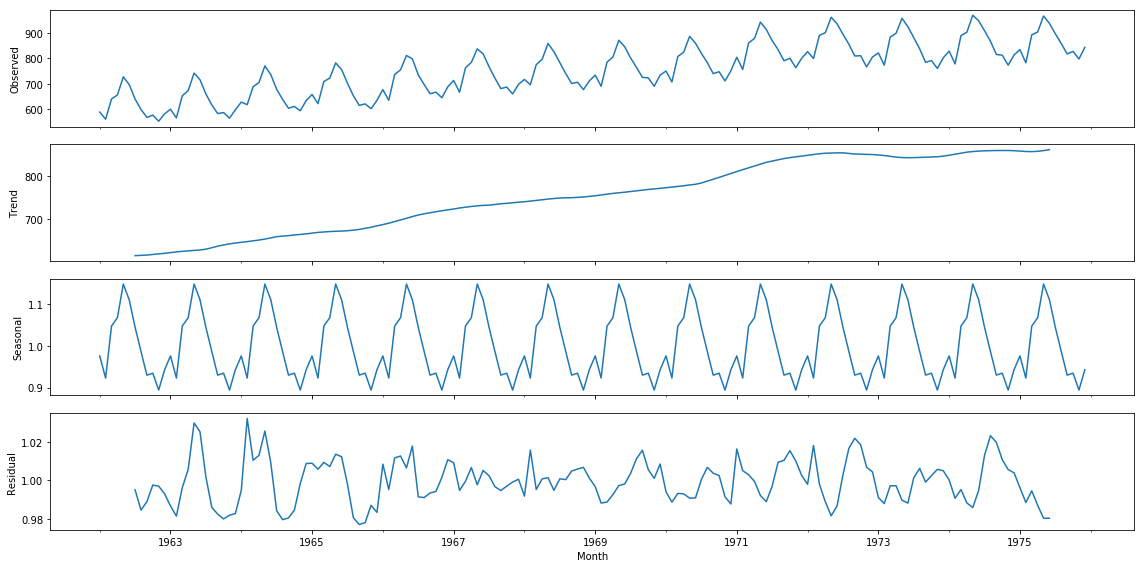

In [37]:
milk_decompose = seasonal_decompose(df_milk["Milk in Pounds per Cow"], model="multiplicative")
milk_decompose.plot();

## Stationarity

A time series is said to be stationary when it's characteristics (mean, variance, covariance) does not change with respect to time. 

We can check for stationarity using Augmented Dicky-Fuller test. This test is based on p-value test. If the p-value turns out to be <= 0.05 then there is strong evidence against null hypothesis. In our case, the null hypothesis is the underlying process is non-stationary. If the p-value is > 0.05 then the process is stationary.

Applying ADF test on the milk production dataset will tell us the nature of the series. We can see visually that the dats is non-stationary, but it is not always possible to extrapolate that visually. 

In [40]:
from statsmodels.tsa.stattools import adfuller


def adf_check(tseries):
    result = adfuller(tseries)
    labels = ["ADF test statistic", "P-Value", "Number of lags", "Number of observations used"]
    for value, label in zip(result, labels):
        print("{0}: {1:0.2f}".format(label, value))
    
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Data is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Data is non-stationary")

adf_check(df_milk["Milk in Pounds per Cow"])

ADF test statistic: -1.30
P-Value: 0.63
Number of lags: 13.00
Number of observations used: 154.00
Weak evidence against null hypothesis
Data is non-stationary


## AutoCorrelation

Auto correlation is a characteristic of data when there is a correlation between the same variable (at different time steps). This happens when the underlying data, instead of being random, is chosen from the same source. 
